# ML model to predict two pair of colors having good readability

## Table of conduct:
* [Introduction](#Introduction)
* [Analyze dataset](#Analyze-dataset)
* [Training models](#Training-models)
* [Optimizing Hyperparameter](#Optimizing-Hyperparameter)
* [Save the model](#Save-the-model)
* [Predict user input](#Predict-user-input)


## Introduction

To determine if a color combination is legible, we must look at color differences and brightness. This is especially important for web design as it affects usability. According to The World Wide Web Consortium (W3C), legibility is determined by differences in brightness and color. Both must be greater than the specified range and can be derived from the formula. But to make things easier, look for an online text readability tool like this Luminosity Color Contrast Ratio Analyzer to see if your color combinations pass the lightness difference test.

### Set up

To check the version of python and remove jupyter warnings

In [30]:
import sys

print(sys.version)

3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]


In [31]:
import warnings

warnings.filterwarnings("ignore")

### Fetching dataset

Download [Readability](https://www.kaggle.com/datasets/karthikudyawar/readability) dataset from Kaggle

In [32]:
import opendatasets as od

In [33]:
readability_dataset_url = "https://www.kaggle.com/datasets/karthikudyawar/readability"

In [34]:
od.download(readability_dataset_url)

Skipping, found downloaded files in ".\readability" (use force=True to force download)


## Analyze dataset

In [35]:
import pandas as pd

Read dataset

In [36]:
df = pd.read_csv("./readability/dataset.csv", encoding="utf-16 le")
df.head()

,color1,color2,readability
0,#BCE81D,#51598B,1
1,#3FBD0D,#159C0F,0
2,#8DDE7F,#3DFC05,0
3,#71C125,#E79106,0
4,#113089,#E378A0,0


Get brief info about dataset

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   color1       1000 non-null   object
 1   color2       1000 non-null   object
 2   readability  1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
readability,1000.0,0.125,0.330884,0.0,0.0,0.0,0.0,1.0


Count no. of entries wrt readability

In [39]:
df.groupby("readability").count()

,color1,color2
readability,,
0,875,875
1,125,125


### Create new features

Function to cover hex code to RGB (Red, Green, Blue)

In [40]:
def hex2rgb(hex_string):
    h = hex_string.lstrip("#")
    return tuple(int(h[i : i + 2], 16) for i in (0, 2, 4))

Added 6 new colum features

In [41]:
df["color1_R"] = df["color1"].apply(lambda x: hex2rgb(x)[0])
df["color1_G"] = df["color1"].apply(lambda x: hex2rgb(x)[1])
df["color1_B"] = df["color1"].apply(lambda x: hex2rgb(x)[2])
df["color2_R"] = df["color2"].apply(lambda x: hex2rgb(x)[0])
df["color2_G"] = df["color2"].apply(lambda x: hex2rgb(x)[1])
df["color2_B"] = df["color2"].apply(lambda x: hex2rgb(x)[2])

Drop `color1` & `color2` colum

In [42]:
df.drop(["color1", "color2"], axis=1, inplace=True)

Optimize the dataframe by changing its types

In [43]:
df = df.astype("int16")
df = df.astype({"readability": "int8"})

### Finale dataframe

In [44]:
df.head()

,readability,color1_R,color1_G,color1_B,color2_R,color2_G,color2_B
0,1,188,232,29,81,89,139
1,0,63,189,13,21,156,15
2,0,141,222,127,61,252,5
3,0,113,193,37,231,145,6
4,0,17,48,137,227,120,160


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   readability  1000 non-null   int8 
 1   color1_R     1000 non-null   int16
 2   color1_G     1000 non-null   int16
 3   color1_B     1000 non-null   int16
 4   color2_R     1000 non-null   int16
 5   color2_G     1000 non-null   int16
 6   color2_B     1000 non-null   int16
dtypes: int16(6), int8(1)
memory usage: 12.8 KB


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
readability,1000.0,0.125,0.330884,0.0,0.00,0.0,0.0,1.0
color1_R,1000.0,124.878,74.257951,0.0,58.00,120.5,190.0,254.0
color1_G,1000.0,128.103,74.626131,0.0,62.00,131.0,191.0,255.0
color1_B,1000.0,125.128,72.922557,0.0,61.00,122.0,184.0,255.0
color2_R,1000.0,134.385,73.693008,0.0,72.75,140.0,197.0,255.0
color2_G,1000.0,129.792,72.136179,0.0,70.00,132.5,192.0,255.0
color2_B,1000.0,128.448,74.904018,0.0,62.00,131.0,193.0,255.0


### Visualization & graph

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

Pairplot

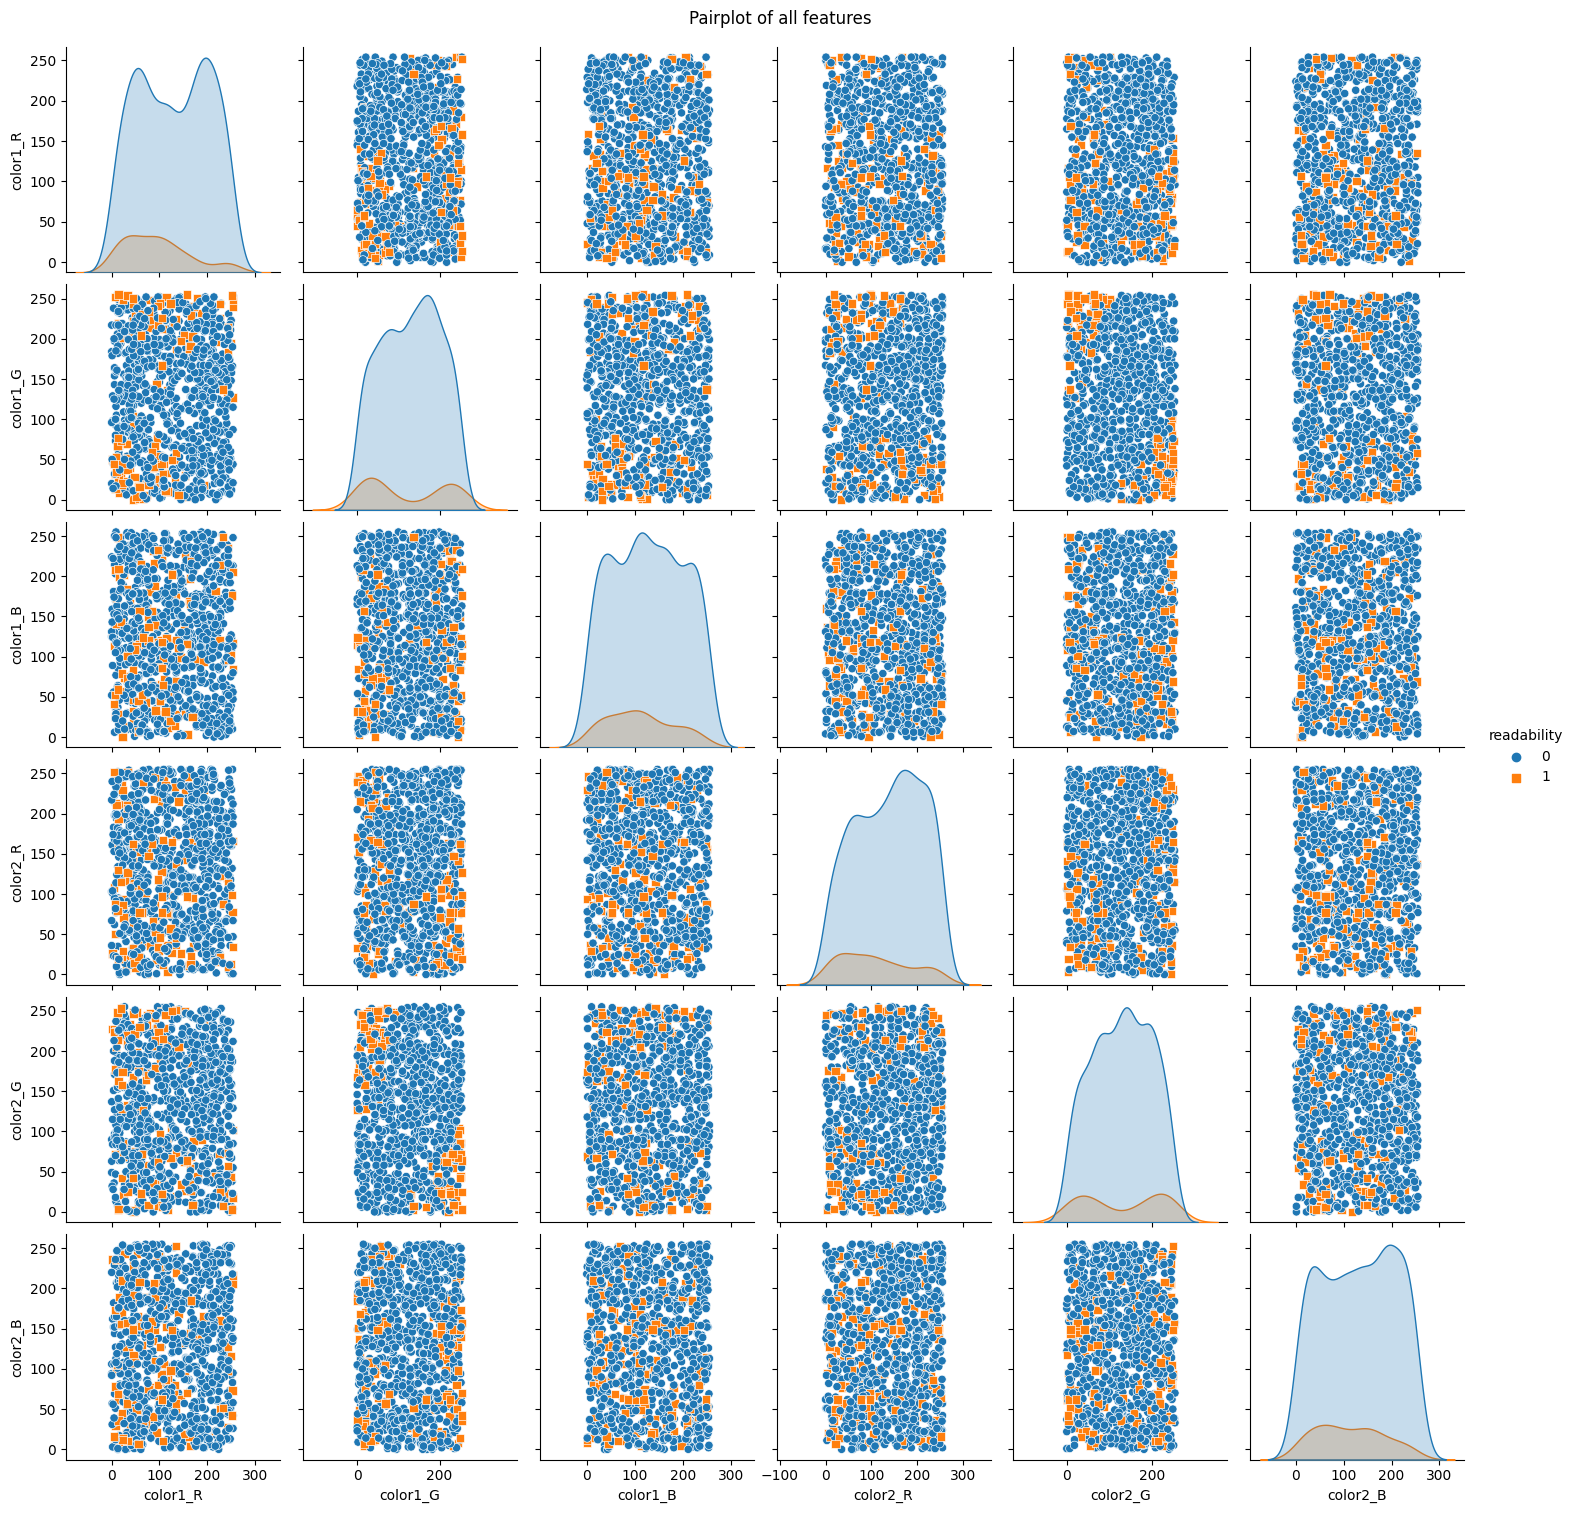

In [172]:
g = sns.pairplot(
    df,
    hue="readability",
    diag_kind="kde",
    markers=["o", "s"],
)
g.fig.suptitle("Pairplot of all features", y=1.01)
plt.show()

Correlation coefficient (r) heatmap

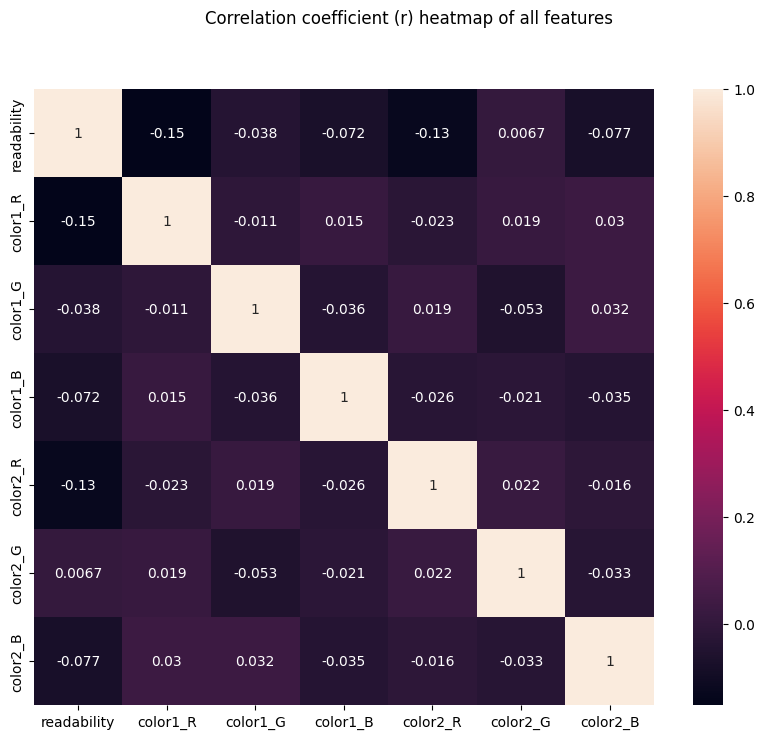

In [180]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.suptitle("Correlation coefficient (r) heatmap of all features")
plt.show()

Pie diagram for Distribution of data

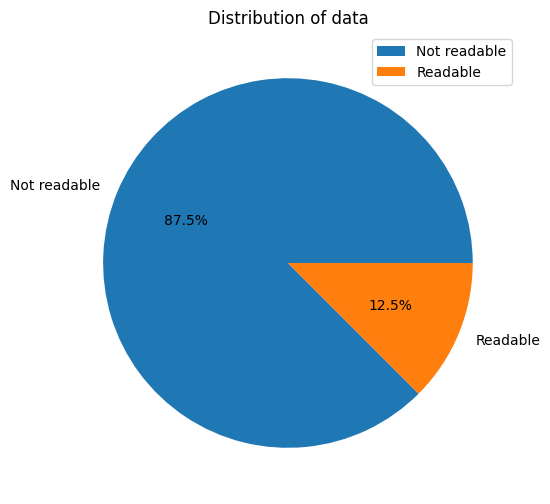

In [50]:
a = df.groupby("readability").size()
a.plot.pie(
    labels=["Not readable", "Readable"],
    figsize=(6, 6),
    autopct="%1.1f%%",
    title="Distribution of data",
)
plt.legend()

Violinplot for every feature wrt readability

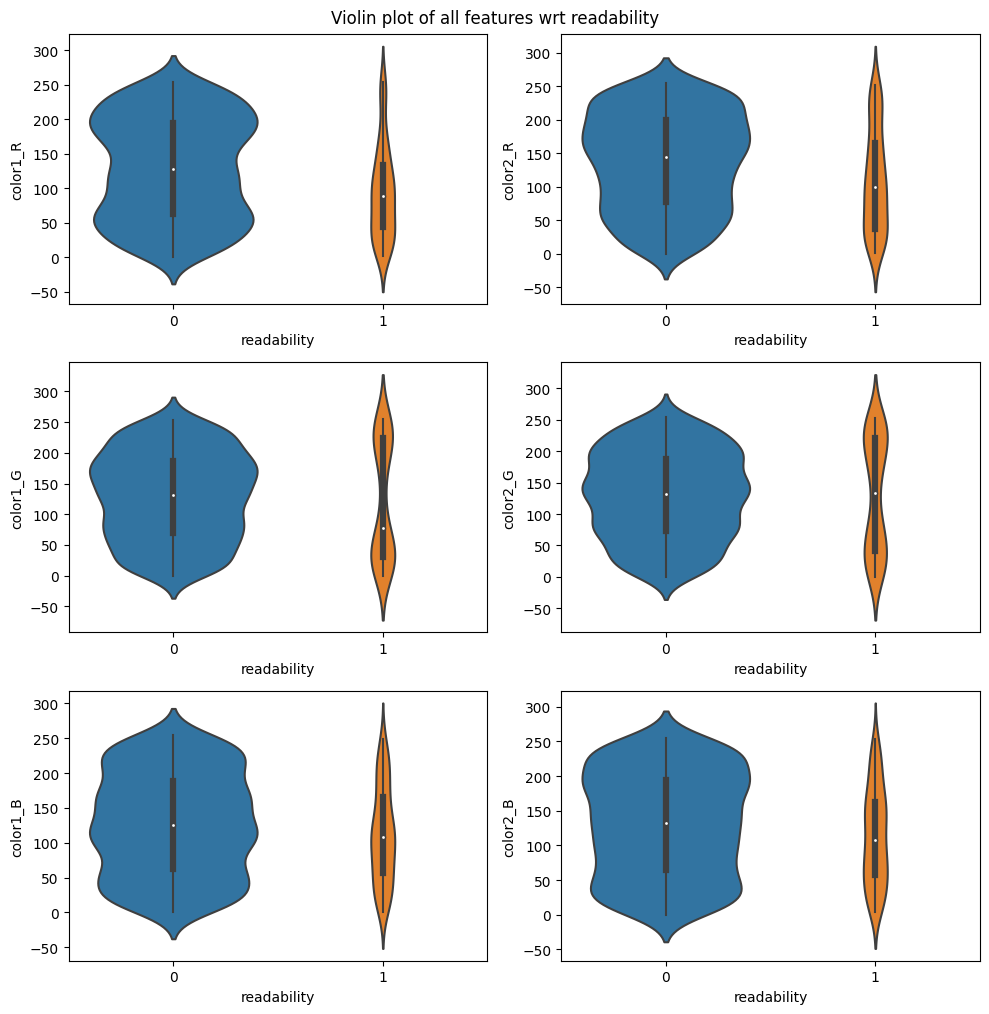

In [183]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(3, 2)

ax = fig.add_subplot(gs[0, 0])
sns.violinplot(data=df, y=df["color1_R"], x=df["readability"], scale="count")
ax.set_xlabel("readability")

ax = fig.add_subplot(gs[1, 0])
sns.violinplot(data=df, y=df["color1_G"], x=df["readability"], scale="count")
ax.set_xlabel("readability")

ax = fig.add_subplot(gs[2, 0])
sns.violinplot(data=df, y=df["color1_B"], x=df["readability"], scale="count")
ax.set_xlabel("readability")

ax = fig.add_subplot(gs[0, 1])
sns.violinplot(data=df, y=df["color2_R"], x=df["readability"], scale="count")
ax.set_xlabel("readability")

ax = fig.add_subplot(gs[1, 1])
sns.violinplot(data=df, y=df["color2_G"], x=df["readability"], scale="count")
ax.set_xlabel("readability")

ax = fig.add_subplot(gs[2, 1])
sns.violinplot(data=df, y=df["color2_B"], x=df["readability"], scale="count")
ax.set_xlabel("readability")

fig.tight_layout()
plt.suptitle("Violin plot of all features wrt readability", y=1.01)
plt.show()

## Training models

### Splitting of dataset

Spilt the data into train and test by the ratio of 3:1

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X = df.drop(["readability"], axis=1).values
y = df["readability"].values

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

Function to generate results of the model (`classification_report` and `ConfusionMatrixDisplay`)

In [164]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_auc_score


def print_result(model, y_pred):
    print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.grid(False)
    disp.ax_.set_title(f"Confusion Matrix Display for {model}")
    return roc_auc_score(y_test, y_pred)

### Random Forest Classifier

              precision    recall  f1-score   support

          No       0.96      1.00      0.98       225
         Yes       1.00      0.60      0.75        25

    accuracy                           0.96       250
   macro avg       0.98      0.80      0.86       250
weighted avg       0.96      0.96      0.96       250



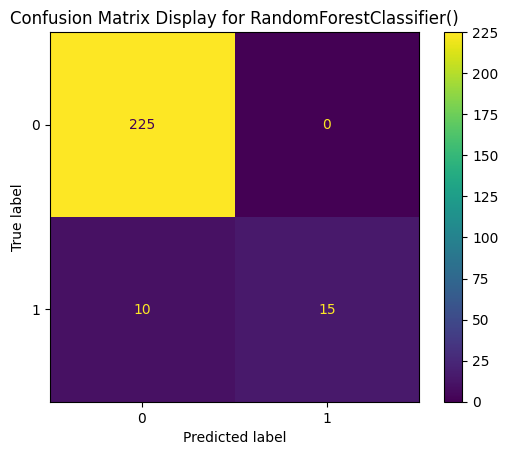

In [165]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_pred_RFC = RFC.predict(X_test)
RFC_score = print_result(RFC, y_pred_RFC)

### K Neighbors Classifier

              precision    recall  f1-score   support

          No       0.96      0.98      0.97       225
         Yes       0.75      0.60      0.67        25

    accuracy                           0.94       250
   macro avg       0.85      0.79      0.82       250
weighted avg       0.94      0.94      0.94       250



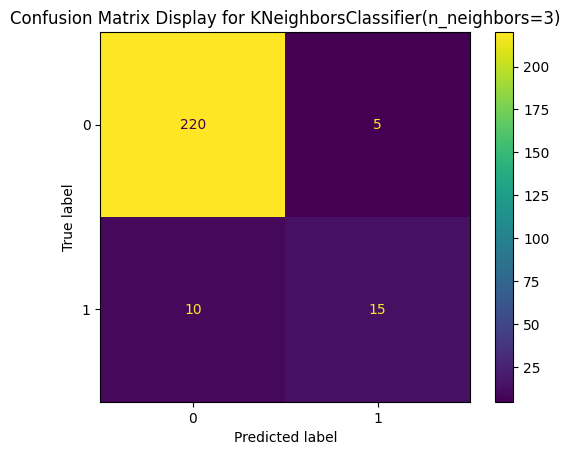

In [166]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)
KNN_score = print_result(KNN, y_pred_KNN)

### GaussianNB

              precision    recall  f1-score   support

          No       0.90      1.00      0.95       225
         Yes       0.00      0.00      0.00        25

    accuracy                           0.90       250
   macro avg       0.45      0.50      0.47       250
weighted avg       0.81      0.90      0.85       250



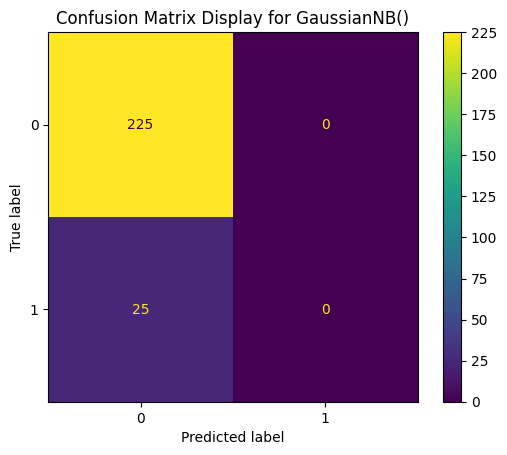

In [167]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred_GNB = GNB.predict(X_test)
GNB_score = print_result(GNB, y_pred_GNB)

### Support vector machine (SVM)

              precision    recall  f1-score   support

          No       0.96      1.00      0.98       225
         Yes       1.00      0.60      0.75        25

    accuracy                           0.96       250
   macro avg       0.98      0.80      0.86       250
weighted avg       0.96      0.96      0.96       250



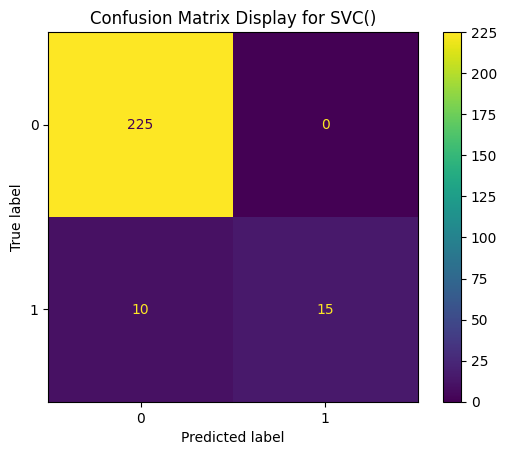

In [168]:
from sklearn import svm

SVM = svm.SVC()
SVM.fit(X_train, y_train)
y_pred_SVM = SVM.predict(X_test)
SVM_score = print_result(SVM, y_pred_SVM)

,model,score
0,RFC,0.800000
3,SVM,0.800000
1,KNN,0.788889
2,GNB,0.500000


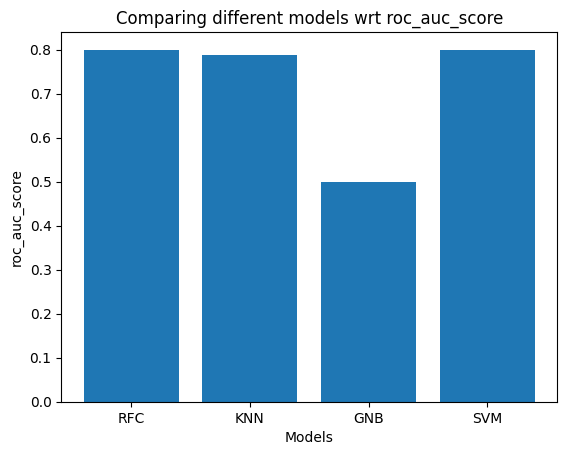

In [169]:
score = [RFC_score, KNN_score, GNB_score, SVM_score]
x_label = ["RFC", "KNN", "GNB", "SVM"]
plt.bar(x_label, score)
plt.xlabel("Models")
plt.ylabel("roc_auc_score")
plt.title("Comparing different models wrt roc_auc_score")
df_score = pd.DataFrame({"model": x_label, "score": score})
df_score.sort_values(by=["score"], ascending=False)

By comparing we come to know `SVM` model is best suitable for our project

## Optimizing Hyperparameter

              precision    recall  f1-score   support

          No       0.98      0.99      0.99       225
         Yes       0.91      0.84      0.87        25

    accuracy                           0.98       250
   macro avg       0.95      0.92      0.93       250
weighted avg       0.98      0.98      0.98       250

roc_auc_score: 0.9155555555555556


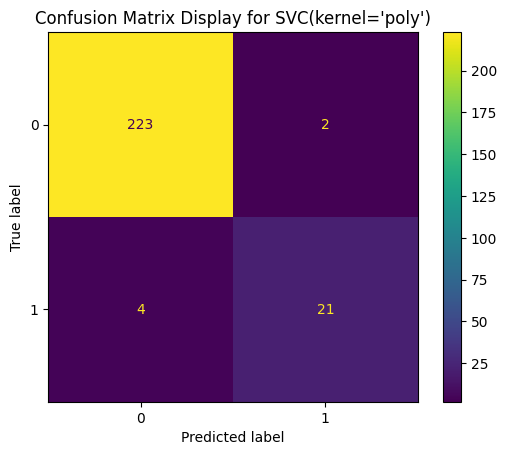

In [170]:
from sklearn import svm

SVM = svm.SVC(kernel="poly", degree=3)
SVM.fit(X_train, y_train)
y_pred_SVM = SVM.predict(X_test)
hyper_SVM_score = print_result(SVM, y_pred_SVM)
print(f"roc_auc_score: {hyper_SVM_score}")

Percentage increase: 14.444444444444441%


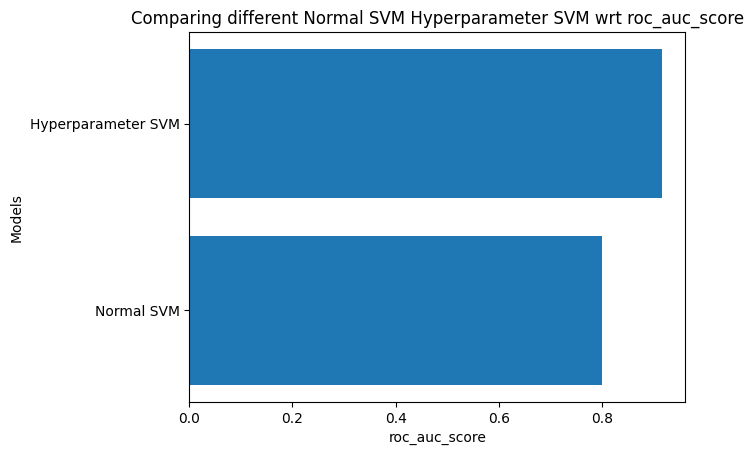

In [154]:
plt.barh(["Normal SVM", "Hyperparameter SVM"], [SVM_score, hyper_SVM_score])
plt.xlabel("roc_auc_score")
plt.ylabel("Models")
plt.title("Comparing different Normal SVM Hyperparameter SVM wrt roc_auc_score")
print(f"Percentage increase: {((hyper_SVM_score - SVM_score) / SVM_score) * 100}%")

## Save the model

Compress the model using `bz2` and pickling it using `joblib`

In [61]:
import bz2
import joblib


def compressed_pickle(title, data):
    with bz2.BZ2File(f"./{title}.pickle", "w") as f:
        joblib.dump(data, f)


def decompress_pickle(file):
    data = bz2.BZ2File(file, "rb")
    data = joblib.load(data)
    return data

In [62]:
compressed_pickle("model", SVM)

## Predict user inputs

In [63]:
import numpy as np

Primary test check

In [64]:
x_input = np.array([2, 12, 45, 225, 111, 231])
SVM.predict([x_input])[0]

1

Function that prediction

In [65]:
def predict(model, c1, c2):
    r1, g1, b1 = hex2rgb(c1)
    r2, g2, b2 = hex2rgb(c2)
    x_input = np.array([r1, g1, b1, r2, g2, b2])
    return model.predict([x_input])[0]

Function to validate input

In [66]:
import re


def isValidHexCode(c):
    regex = "^#([A-Fa-f0-9]{6})$"
    p = re.compile(regex)
    return False if c is None else bool((re.search(p, c)))

Taking valid user inputs

In [89]:
model = decompress_pickle("model.pickle")
color1 = str(input("Enter first color: "))
color2 = str(input("Enter second color: "))

if isValidHexCode(color1) and isValidHexCode(color2):
    print(f"Model = {model}, Color 1: {color1}, Color 2: {color2}")
else:
    raise ValueError(
        "Invalid input hex string. Required 6 char hex string starting with #"
    )

Model = SVC(kernel='poly'), Color 1: #ffffff, Color 2: #112277


Prediction display

In [90]:
print(
    f"Color 1: {color1}, Color 2: {color2} are",
    "\b" if predict(model, color1, color2) else "not",
    "readable",
)

Color 1: #ffffff, Color 2: #112277 are readable


### Testing

In [93]:
from IPython.display import Markdown

display(
    Markdown(
        f'<span style="color:{color1};background-color:{color2};font-size: 30px;">&nbsp;&nbsp;&nbsp;Hello world&nbsp;&nbsp;&nbsp;</span>'
    )
)

<span style="color:#ffffff;background-color:#112277;font-size: 30px;">&nbsp;&nbsp;&nbsp;Hello world&nbsp;&nbsp;&nbsp;</span>

### Generate pair of color which can be readable

In [69]:
from random import randint


def get_random_hex():
    c1 = randint(0, 16777216)
    c2 = randint(0, 16777216)
    co1 = f"#{hex(c1)[2:].zfill(6)}"
    co2 = f"#{hex(c2)[2:].zfill(6)}"
    return co1, co2


def generate(n):
    gen = []
    while n > 0:
        co1, co2 = get_random_hex()
        if predict(model, co1, co2):
            gen.append((co1, co2))
            n -= 1
    return gen

Generate 10 pair colors

In [70]:
generate(10)

[('#262540', '#f2a190'),
 ('#1fab07', '#470a34'),
 ('#a705d0', '#bff1b0'),
 ('#ce9fa9', '#4a1925'),
 ('#10cf90', '#062bcc'),
 ('#8c2842', '#73f4dd'),
 ('#5f1220', '#a7b7c4'),
 ('#072952', '#73a856'),
 ('#2919b5', '#0ffd53'),
 ('#011e32', '#5f88b9')]